# Prediction of chances of  HeartAttack


We are going to apply multiple models on our Dataset like :
* Random Forest 
* Desicion Tree
* Naive Bayes
* knn 

# Steps that we are going perform 
* Import Libraries and Dataset
* Exploring Dataset
* Data preprocessing begins  
* Spliting Numerical and Categorical Values 
* Exploring Categorical Columns 
* Spliting Columns for One Hot Encoding and Label Encoding 
* Investigating Missing Values 
* Bring Data Together 
* Split Data to Train and Test 
* Training our models 
* Compare Models Perfomance 


# Import Libraries and Dataset


In [32]:
# Importing Pandas an Numpy Libraries to use on manipulating our Data
import pandas as pd
import numpy as np

# To Preproccesing our data
from sklearn.preprocessing import LabelEncoder

# To fill missing values
from sklearn.impute import SimpleImputer

# To Split our train data
from sklearn.model_selection import train_test_split

# To Visualize Data
import matplotlib.pyplot as plt
import seaborn as sns

# To Train our data

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB


# To evaluate end result we have
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report ,confusion_matrix ,ConfusionMatrixDisplay

#  To use Scaling 
from sklearn.preprocessing import StandardScaler   #  used for optimization purposes
from sklearn.decomposition import PCA

# We are importing our Data with Pandas Library

df = pd.read_csv("heart-2.csv")


# Exploring Dataset 
* In this  we will look at our train DataFrame. head() function print first 5 rows in our DataFrame

In [33]:
# Prints first 5 row in Data
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,Male,asymptomatic,145,233,high,normal,150,no,2.3,0,0,fixed deffect,1
1,37,Male,non anginal pain,130,250,normal,S-T abnormanilty,187,no,3.5,0,0,reversible deffect,1
2,41,Female,atypical angina,130,204,normal,normal,172,no,1.4,2,0,reversible deffect,1
3,56,Male,atypical angina,120,236,normal,S-T abnormanilty,178,no,0.8,2,0,reversible deffect,1
4,57,Female,typical angina,120,354,normal,S-T abnormanilty,163,yes,0.6,2,0,reversible deffect,1


In [34]:
# Print number of rows in data
# Size and shape of dataset
print(df.size)
print(df.shape)

4242
(303, 14)


In [35]:
# Prints Summary of Numerical Data
df.describe()

,age,trestbps,chol,thalach,oldpeak,slope,ca,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604,1.399340,0.729373,0.544554
std,9.082101,17.538143,51.830751,22.905161,1.161075,0.616226,1.022606,0.498835
min,29.000000,94.000000,126.000000,71.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000,1.000000,0.000000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000,1.000000,0.000000,1.000000
75%,61.000000,140.000000,274.500000,166.000000,1.600000,2.000000,1.000000,1.000000
max,77.000000,200.000000,564.000000,202.000000,6.200000,2.000000,4.000000,1.000000


In [36]:
# Prints Summary of Categorical Data
df.describe(include=[np.object])

<ipython-input-36-5be15f72be49>:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df.describe(include=[np.object])


,sex,cp,fbs,restecg,exang,thal
count,303,303,303,303,303,303
unique,2,4,2,3,2,4
top,Male,typical angina,normal,S-T abnormanilty,no,reversible deffect
freq,207,143,258,152,204,166


# Spliting Numerical and Categorical Values 
We will split categorical (String) and numerical values. select_dtypes function selects column in our DataFrame includes or exculudes type we define. "object" stands for String values inside our DataFrame.

* When we include type of "object" we select String Columns
* When we exclude type of "object" we select Numerical Columns

In [37]:
numerical_column = df.select_dtypes(exclude="object").columns.tolist()
categorical_column = df.select_dtypes(include="object").columns.tolist()
# another way
# categorial_column=df.describe(include=[np.object])
print("Numerical Columns:", numerical_column)
print("********************************************************************************************")
print("Categorical Columns:", categorical_column)

Numerical Columns: ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'slope', 'ca', 'target']
********************************************************************************************
Categorical Columns: ['sex', 'cp', 'fbs', 'restecg', 'exang', 'thal']


# Exploring Categorical Columns 
In this section we will look for our Categorical (String) columns. In here we will see unique row which is unique values column has. We will use that info to split our categorical columns to encoding later on.

In [38]:
df[categorical_column].describe()

,sex,cp,fbs,restecg,exang,thal
count,303,303,303,303,303,303
unique,2,4,2,3,2,4
top,Male,typical angina,normal,S-T abnormanilty,no,reversible deffect
freq,207,143,258,152,204,166


# Spliting Columns for One Hot Encoding and Label Encoding 
There is 6 categorical column in dataset. We will transform columns that have less than 10 and more then 2 unique values, with One Hot Encoder (We define new column for each value).

We will transform rest of columns with Label Encoding (We dont define new columns instead of that we give a numerical value for each unique label).

* We are not using One Hot Encoding on columns have more then 10 unique value because of It will effect performance very badly. 
* We are not using One Hot Encoding on 2 unique values because it will cause "Dummy Variable" proglem. 


In [39]:
# Get column names have less than 10 more than 2 unique values
to_one_hot_encoding = [col for col in categorical_column if df[col].nunique() <= 10 and df[col].nunique() > 2]

# Get Categorical Column names thoose are not in "to_one_hot_encoding"
to_label_encoding = [col for col in categorical_column if not col in to_one_hot_encoding]

print("To One Hot Encoding:", to_one_hot_encoding)
print("To Label Encoding:", to_label_encoding)


To One Hot Encoding: ['cp', 'restecg', 'thal']
To Label Encoding: ['sex', 'fbs', 'exang']


# Investigating Missing Values 
In this section we will search for missing columns. If our data has missing columns it can produce error while we training our data. 


In [40]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# One Hot Encoding and Label Encoding 

In [41]:
# We will use built in pandas function "get_dummies()" to simply to encode "to_one_hot_encoding" columns
one_hot_encoded_columns = pd.get_dummies(df[to_one_hot_encoding])
one_hot_encoded_columns

,cp_asymptomatic,cp_atypical angina,cp_non anginal pain,cp_typical angina,restecg_2,restecg_S-T abnormanilty,restecg_normal,thal_deffect-3,thal_fixed deffect,thal_normal,thal_reversible deffect
0,1,0,0,0,0,0,1,0,1,0,0
1,0,0,1,0,0,1,0,0,0,0,1
2,0,1,0,0,0,0,1,0,0,0,1
3,0,1,0,0,0,1,0,0,0,0,1
4,0,0,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
298,0,0,0,1,0,1,0,1,0,0,0
299,1,0,0,0,0,1,0,1,0,0,0
300,0,0,0,1,0,1,0,1,0,0,0
301,0,0,0,1,0,1,0,1,0,0,0


In [42]:
# Label Encoding

label_encoded_columns = []
# For loop for each columns
for col in to_label_encoding:
    # We define new label encoder to each new column
    le = LabelEncoder()
    # Encode our data and create new Dataframe of it, 
    # notice that we gave column name in "columns" arguments
    column_dataframe = pd.DataFrame(le.fit_transform(df[col]), columns=[col] )
    # and add new DataFrame to "label_encoded_columns" list
    label_encoded_columns.append(column_dataframe)

# Merge all data frames
label_encoded_columns = pd.concat(label_encoded_columns, axis=1)
label_encoded_columns

,sex,fbs,exang
0,1,0,0
1,1,1,0
2,0,1,0
3,1,1,0
4,0,1,1
...,...,...,...
298,0,1,1
299,1,1,0
300,1,0,0
301,1,1,1


# Bring Data Together 
Now our whole data is in Numerical Form ,
Now we will birng all modified data to one single DataFrame then we examine our data 

In [43]:
# Copy our DataFrame to X variable
X = df.copy()

# Droping Categorical Columns,
# "inplace" means replace our data with new one
# Don't forget to "axis=1"
X.drop(categorical_column, axis=1, inplace=True)

# Merge DataFrames
X = pd.concat([X, one_hot_encoded_columns, label_encoded_columns], axis=1)
print("All columns:", X.columns.tolist())
X

All columns: ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'slope', 'ca', 'target', 'cp_asymptomatic', 'cp_atypical angina', 'cp_non anginal pain', 'cp_typical angina', 'restecg_2', 'restecg_S-T abnormanilty', 'restecg_normal', 'thal_deffect-3', 'thal_fixed deffect', 'thal_normal', 'thal_reversible deffect', 'sex', 'fbs', 'exang']


,age,trestbps,chol,thalach,oldpeak,slope,ca,target,cp_asymptomatic,cp_atypical angina,...,restecg_2,restecg_S-T abnormanilty,restecg_normal,thal_deffect-3,thal_fixed deffect,thal_normal,thal_reversible deffect,sex,fbs,exang
0,63,145,233,150,2.3,0,0,1,1,0,...,0,0,1,0,1,0,0,1,0,0
1,37,130,250,187,3.5,0,0,1,0,0,...,0,1,0,0,0,0,1,1,1,0
2,41,130,204,172,1.4,2,0,1,0,1,...,0,0,1,0,0,0,1,0,1,0
3,56,120,236,178,0.8,2,0,1,0,1,...,0,1,0,0,0,0,1,1,1,0
4,57,120,354,163,0.6,2,0,1,0,0,...,0,1,0,0,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,140,241,123,0.2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,1
299,45,110,264,132,1.2,1,0,0,1,0,...,0,1,0,1,0,0,0,1,1,0
300,68,144,193,141,3.4,1,2,0,0,0,...,0,1,0,1,0,0,0,1,0,0
301,57,130,131,115,1.2,1,1,0,0,0,...,0,1,0,1,0,0,0,1,1,1


# Split Data to Train and Test 
We successfuly complete data manipulation. There is one more step to Train our data with Machine Learning. We will split data to Train and Test groups. It's important because we use Test group to see our Machine Learning Models performance

First we will split data to two parts X and Y. 
* X is our data without target column
* Y is our target to predict

In [44]:
# Define Y (This is the value we will predict)
y = df["target"]

# Droping "class" from X
X.drop(["target"], axis=1, inplace=True)
X

,age,trestbps,chol,thalach,oldpeak,slope,ca,cp_asymptomatic,cp_atypical angina,cp_non anginal pain,...,restecg_2,restecg_S-T abnormanilty,restecg_normal,thal_deffect-3,thal_fixed deffect,thal_normal,thal_reversible deffect,sex,fbs,exang
0,63,145,233,150,2.3,0,0,1,0,0,...,0,0,1,0,1,0,0,1,0,0
1,37,130,250,187,3.5,0,0,0,0,1,...,0,1,0,0,0,0,1,1,1,0
2,41,130,204,172,1.4,2,0,0,1,0,...,0,0,1,0,0,0,1,0,1,0
3,56,120,236,178,0.8,2,0,0,1,0,...,0,1,0,0,0,0,1,1,1,0
4,57,120,354,163,0.6,2,0,0,0,0,...,0,1,0,0,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,140,241,123,0.2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,1
299,45,110,264,132,1.2,1,0,1,0,0,...,0,1,0,1,0,0,0,1,1,0
300,68,144,193,141,3.4,1,2,0,0,0,...,0,1,0,1,0,0,0,1,0,0
301,57,130,131,115,1.2,1,1,0,0,0,...,0,1,0,1,0,0,0,1,1,1


Now it's time to split our data to train and test

In [45]:
# You can specify test size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.31,random_state=0)

# TRAINING DATA 


* Random Forest 
* Desicion Tree
* Naive Bayes
* KNN (K-Nearest Neighbors)


#  Random Forest 


* Random Forest MinMax Scalar

              precision    recall  f1-score   support

  Predicated       0.84      0.80      0.82        45
      Actual       0.82      0.86      0.84        49

    accuracy                           0.83        94
   macro avg       0.83      0.83      0.83        94
weighted avg       0.83      0.83      0.83        94



<AxesSubplot:>

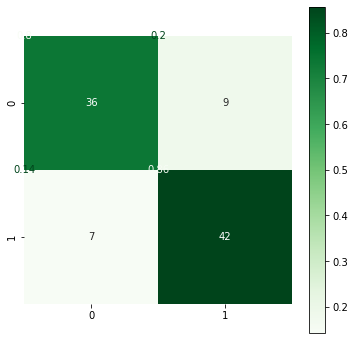

In [46]:
mms = MinMaxScaler()
X_train_min = mms.fit_transform(X_train)
X_test_min = mms.fit_transform(X_test)

# Define Random Forest Model
rf = RandomForestClassifier(n_estimators=100)

# We fit our model with our train data
rf.fit(X_train_min, y_train)

# Then predict results from X_test data
pred_rf = rf.predict(X_test_min)


target_names = ['Predicated','Actual']
print(classification_report(y_test, pred_rf.reshape(-1,1), target_names=target_names))

cm = confusion_matrix(y_test, pred_rf.reshape(-1,1), normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
fig, ax = plt.subplots(figsize=(6,6))
disp.plot(ax=ax,cmap='Greens')


conf_mat = confusion_matrix(y_test, pred_rf)
sns.heatmap(conf_mat, square=True, annot=True, cmap='Greens', fmt='d', cbar=False)



* Random Forest PCA Scalar 

              precision    recall  f1-score   support

  Predicated       0.87      0.73      0.80        45
      Actual       0.79      0.90      0.84        49

    accuracy                           0.82        94
   macro avg       0.83      0.82      0.82        94
weighted avg       0.83      0.82      0.82        94



<AxesSubplot:>

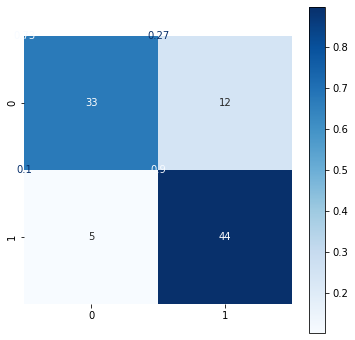

In [47]:
independent_scaler= StandardScaler()
X_train_norm = independent_scaler.fit_transform(X_train)
X_test_norm = independent_scaler.fit_transform(X_test)

pca =PCA(n_components =2 )
# Convert all the columns into two components / columns
X_train_pca = pca.fit_transform(X_train_norm)
X_train_pca = pca.transform(X_train_norm)
X_test_pca  = pca.fit_transform(X_test_norm)
X_test_pca = pca.transform(X_test_norm)


# Define Random Forest Model
rf = RandomForestClassifier(n_estimators=100)

# We fit our model with our train data
rf.fit(X_train_pca, y_train)

# Then predict results from X_test data
pred_rf = rf.predict(X_test_pca)


target_names = ['Predicated','Actual']
print(classification_report(y_test, pred_rf.reshape(-1,1), target_names=target_names))

cm = confusion_matrix(y_test, pred_rf.reshape(-1,1), normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
fig, ax = plt.subplots(figsize=(6,6))
disp.plot(ax=ax,cmap='Blues')

conf_mat = confusion_matrix(y_test, pred_rf)
sns.heatmap(conf_mat, square=True, annot=True, cmap='Blues', fmt='d', cbar=False)


#  Decision Tree 
Decision Tree is our second algorithm.

 Decision Tree MinMax Scalar

              precision    recall  f1-score   support

  Predicated       0.69      0.78      0.73        45
      Actual       0.77      0.67      0.72        49

    accuracy                           0.72        94
   macro avg       0.73      0.73      0.72        94
weighted avg       0.73      0.72      0.72        94



<AxesSubplot:>

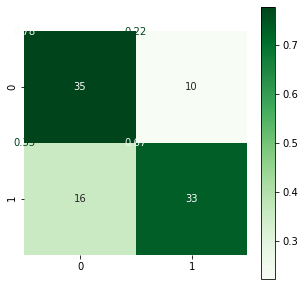

In [48]:
mms = MinMaxScaler()
X_train_min = mms.fit_transform(X_train)
X_test_min = mms.fit_transform(X_test)
# Define Decision Tree Model
dt = DecisionTreeClassifier()
X_train_min = mms.fit_transform(X_train)
X_test_min = mms.fit_transform(X_test)
# We fit our model with our train data
dt.fit(X_train_min, y_train)
# Then predict results from X_test data
pred_dt = dt.predict(X_test_min)


target_names = ['Predicated','Actual']
print(classification_report(y_test, pred_dt.reshape(-1,1), target_names=target_names))

cm = confusion_matrix(y_test, pred_dt.reshape(-1,1), normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
fig, ax = plt.subplots(figsize=(5,5))
disp.plot(ax=ax,cmap='Greens')
conf_mat = confusion_matrix(y_test, pred_dt)
sns.heatmap(conf_mat, square=True, annot=True, cmap='Greens', fmt='d', cbar=False)



Decision Tree PCA   Scalar

              precision    recall  f1-score   support

  Predicated       0.80      0.73      0.77        45
      Actual       0.77      0.84      0.80        49

    accuracy                           0.79        94
   macro avg       0.79      0.79      0.79        94
weighted avg       0.79      0.79      0.79        94



<AxesSubplot:>

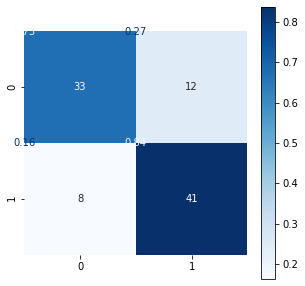

In [49]:

# Define Decision Tree Model
dt = DecisionTreeClassifier()

dt.fit(X_train_pca, y_train)
# Then predict results from X_test data
pred_dt = dt.predict(X_test_pca)

target_names = ['Predicated','Actual']
print(classification_report(y_test, pred_dt.reshape(-1,1), target_names=target_names))

cm = confusion_matrix(y_test, pred_dt.reshape(-1,1), normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
fig, ax = plt.subplots(figsize=(5,5))
disp.plot(ax=ax,cmap='Blues')

conf_mat = confusion_matrix(y_test, pred_dt)
sns.heatmap(conf_mat, square=True, annot=True, cmap='Blues', fmt='d', cbar=False)




# Naive Bayes 


MinMax

              precision    recall  f1-score   support

   Predicted       0.87      0.73      0.80        45
      Actual       0.79      0.90      0.84        49

    accuracy                           0.82        94
   macro avg       0.83      0.82      0.82        94
weighted avg       0.83      0.82      0.82        94



<AxesSubplot:>

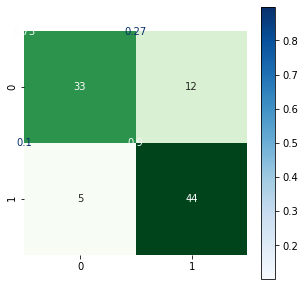

In [51]:

from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train_min, y_train)

prediction_mm = model.predict(X_test_min)

target_names = ['Predicted','Actual']
print(classification_report(y_test, prediction_mm.reshape(-1,1), target_names=target_names))

cm = confusion_matrix(y_test, prediction_mm.reshape(-1,1), normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
fig, ax = plt.subplots(figsize=(5,5))
disp.plot(ax=ax,cmap='Blues')

conf_mat = confusion_matrix(y_test, prediction_mm)
sns.heatmap(conf_mat, square=True, annot=True, cmap='Greens', fmt='d', cbar=False)


pca

              precision    recall  f1-score   support

   Predicted       0.82      0.73      0.78        45
      Actual       0.78      0.86      0.82        49

    accuracy                           0.80        94
   macro avg       0.80      0.80      0.80        94
weighted avg       0.80      0.80      0.80        94



<AxesSubplot:>

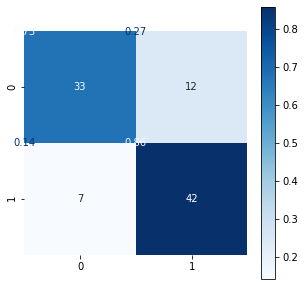

In [52]:
from sklearn.preprocessing import StandardScaler   #  used for optimization purposes
independent_scaler= StandardScaler()
X_train_norm = independent_scaler.fit_transform(X_train)
X_test_norm = independent_scaler.fit_transform(X_test)

from sklearn.decomposition import PCA
pca =PCA(n_components =2 )
# Convert all the columns into two components / columns
X_train_pca = pca.fit_transform(X_train_norm)
X_train_pca = pca.transform(X_train_norm)
X_test_pca  = pca.fit_transform(X_test_norm)
X_test_pca = pca.transform(X_test_norm)

model = GaussianNB()
model.fit(X_train_pca, y_train)

prediction_pca= model.predict(X_test_pca)

target_names = ['Predicted','Actual']
print(classification_report(y_test, prediction_pca.reshape(-1,1), target_names=target_names))

cm = confusion_matrix(y_test, prediction_pca.reshape(-1,1), normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
fig, ax = plt.subplots(figsize=(5,5))
disp.plot(ax=ax,cmap='Blues')

conf_mat = confusion_matrix(y_test, prediction_pca)
sns.heatmap(conf_mat, square=True, annot=True, cmap='Blues', fmt='d', cbar=False)


# KNN (K-Nearest Neighbors) 
KNN is based on calculation of nearest elements to our data.

MinMax

              precision    recall  f1-score   support

  Predicated       0.80      0.73      0.77        45
      Actual       0.77      0.84      0.80        49

    accuracy                           0.79        94
   macro avg       0.79      0.79      0.79        94
weighted avg       0.79      0.79      0.79        94



<AxesSubplot:>

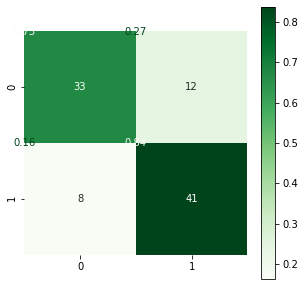

In [53]:

mms = MinMaxScaler()
X_train_min = mms.fit_transform(X_train)
X_test_min = mms.fit_transform(X_test)

# Define KNN Model
knn = KNeighborsClassifier(n_neighbors=3, metric="minkowski")
# We fit our model with our train data
knn.fit(X_train_min, y_train)
# Then predict results from X_test data
pred_knn = knn.predict(X_test_min)
target_names = ['Predicated','Actual']
print(classification_report(y_test, pred_knn.reshape(-1,1), target_names=target_names))

cm = confusion_matrix(y_test, pred_knn.reshape(-1,1), normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
fig, ax = plt.subplots(figsize=(5,5))
disp.plot(ax=ax,cmap='Greens')

conf_mat = confusion_matrix(y_test, pred_knn)
sns.heatmap(conf_mat, square=True, annot=True, cmap='Greens', fmt='d', cbar=False)




Pca Scalar

              precision    recall  f1-score   support

  Predicated       0.84      0.71      0.77        45
      Actual       0.77      0.88      0.82        49

    accuracy                           0.80        94
   macro avg       0.80      0.79      0.80        94
weighted avg       0.80      0.80      0.80        94



<AxesSubplot:>

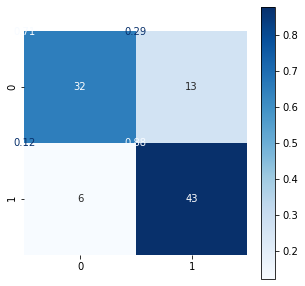

In [54]:
X_train_norm = independent_scaler.fit_transform(X_train)
X_test_norm = independent_scaler.fit_transform(X_test)

X_train_pca = pca.fit_transform(X_train_norm)
X_train_pca = pca.transform(X_train_norm)
X_test_pca  = pca.fit_transform(X_test_norm)
X_test_pca = pca.transform(X_test_norm)

# Define KNN Model
knn = KNeighborsClassifier(n_neighbors=3, metric="minkowski")
# We fit our model with our train data
knn.fit(X_train_pca, y_train)
# Then predict results from X_test data
pred_knn = knn.predict(X_test_pca)
target_names = ['Predicated','Actual']
print(classification_report(y_test, pred_knn.reshape(-1,1), target_names=target_names))

cm = confusion_matrix(y_test, pred_knn.reshape(-1,1), normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
fig, ax = plt.subplots(figsize=(5,5))
disp.plot(ax=ax,cmap='Blues')
conf_mat = confusion_matrix(y_test, pred_knn)
sns.heatmap(conf_mat, square=True, annot=True, cmap='Blues', fmt='d', cbar=False)



# Compare Models Perfomance 
In this section we will compare performance of models which we train in previous section. We will use "confusion_matrix" and "accuracy_score" from sklearn library. Then we choose best model for our data.

# Confusion Maxtrixes 

In [56]:
# Confusion Matrixes
# First parameter is actual value
# second parameter is value that we prediceted

# Random Forest 
cm_rf = confusion_matrix(y_test, pred_rf)
# Desicion Tree
cm_dt = confusion_matrix(y_test, pred_dt)
# Logistic Regression
cm_nb = confusion_matrix(y_test, prediction_pca)
# KNN (K-Nearest Neighbors)
cm_knn = confusion_matrix(y_test, pred_knn)

print("***********************")
print("Confusion Matrixes")
print("***********************")
print("Random Forest:\n", cm_rf)
print("Desicion Tree:\n", cm_dt)
print("Naive Bayes:\n", cm_nb)
print("KNN (K-Nearest Neighbors):\n", cm_knn)


***********************
Confusion Matrixes
***********************
Random Forest:
 [[33 12]
 [ 5 44]]
Desicion Tree:
 [[33 12]
 [ 8 41]]
Naive Bayes:
 [[33 12]
 [ 7 42]]
KNN (K-Nearest Neighbors):
 [[32 13]
 [ 6 43]]


# Accuracy Scores using  MinMax Scalar

In [57]:
# Accuracy Scores
# First parameter is actual value
# second parameter is value that we prediceted

# Random Forest 
acc_rf = accuracy_score(y_test, pred_rf)
# Desicion Tree
acc_dt = accuracy_score(y_test, pred_dt)
# Logistic Regression
acc_nb = accuracy_score(y_test, prediction_pca)
# KNN (K-Nearest Neighbors)
acc_knn = accuracy_score(y_test, pred_knn)

print("***********************")
print("Accuracy Scores using MinMax Scalar")
print("***********************")
print("Random Forest:", acc_rf)
print("Desicion Tree:", acc_dt)
print("Naive Bayes:", acc_nb)
print("KNN (K-Nearest Neighbors):", acc_knn)


***********************
Accuracy Scores using MinMax Scalar
***********************
Random Forest: 0.8191489361702128
Desicion Tree: 0.7872340425531915
Naive Bayes: 0.7978723404255319
KNN (K-Nearest Neighbors): 0.7978723404255319


# Conclusion

* So by the observation of evaluation of all the Models  the most precise model is Random Forest   for my dataset .
* With
* Accuracy of 83 % 
* Precison of 87 %
* Recall of 76 % 
* f1 score of 81 %

# Machine Learning Project created by : Shlok Dhokai 